In [3]:
import pandas as pd
import ast
import numpy as np

In [4]:
questions = pd.read_csv('data/Multiple/CombinedMultipleDataWithCategories.csv')
questions

,QuestionText,Answer,Year,Categories,AnswerChoices
0,What will the end-of-day closing value for the...,6.40 or more,2016,['Stock Market'],"['Less than 6.30', 'Between 6.30 and 6.35, inc..."
1,How many seats will the Justice and Developmen...,A majority,2015,[],"['A majority', 'A plurality', 'Not a plurality']"
2,Will Congress pass a resolution disapproving t...,No,2015,[],"['No', 'Yes, but the resolution will be vetoed..."
3,Who will win the presidential election in Arge...,Mauricio Macri,2015,"['Political', 'Stock Market']","['Someone else', 'Sergio Massa', 'Mauricio Mac..."
4,How many seats in Poland's Sejm will PiS (Law ...,Majority,2015,[],"['Majority', 'Plurality', 'Not a Plurality']"
...,...,...,...,...,...
921,Jun 2022,More than or equal to 90 but less than 100,2022,['Stock Market'],"['Less than 40', 'More than or equal to 40 but..."
922,What will be the price per ton of aluminum on ...,Less than $3000,2022,[],"['Less than $3000', 'More than or equal to $30..."
923,What will be the end of day closing price of t...,Less than $240,2022,['Stock Market'],"['Less than $240', 'More than or equal to $240..."
924,What will be the price of crude oil futures on...,More than or equal to $105 but less than $120,2022,['Stock Market'],"['Less than $75', 'More than or equal to $75 b..."


In [8]:
def find_matching_string(answer_choices, predictions_text):
    predictions_text_set = set(predictions_text.lower().split())

    for i, choice in enumerate(answer_choices, start=1):
        choice_words_set = set(choice.lower().split())
        intersection = choice_words_set.intersection(predictions_text_set)

        if len(intersection) >= 2:
            return choice, i

    return None, None

In [9]:
def calculateBRIER(data):
    noneCounter = 0
    brier = 0
    lenOptions = []
    correct = 0
    for i in range(len(data)):
        if data['MatchingString'][i] is None:
            noneCounter += 1
            continue
        
        choices = ast.literal_eval(data['AnswerChoices'][i])
        lenOptions.append(len(choices))
        if choices[int(data['MatchingIndex'][i])-1] != data['Answer'][i]:
            brier += 1
        else:
            correct += 1
    avgOptions = sum(lenOptions)/len(lenOptions)
    return brier/(len(data)-noneCounter), noneCounter, correct/(len(data)-noneCounter), avgOptions

In [10]:
allYears = list(questions['Year'].unique())
allYears

[2016, 2015, 2017, 2018, 2019, 2020, 2021, 2022]

In [11]:
allCategories = [
    'Technology',
    'Political',
    'Sports',
    'Health and Epidemiology',
    'Stock Market',
    'Supply Chain'
]

### WizardLM

In [12]:
WLMPredictions = pd.read_csv('data/Multiple/WizardMulti0-925.csv')
WLMPredictions

,Unnamed: 0,predictions
0,0,"Option 2: Between 6.30 and 6.35, inclusive"
1,1,The AKP is likely to win a majority of seats.
2,2,"Yes, Congress passes a resolution disapproving..."
3,3,"I'm sorry, but as an AI developed by OpenAI, I..."
4,4,"I am sorry for any confusion, but as an AI dev..."
...,...,...
921,921,Less than 40
922,922,Less than $3000
923,923,The end of day closing price of the VanEck Sem...
924,924,Less than $75


In [13]:
WLMTotal = questions.copy(deep=True)
WLMTotal['Predictions'] = WLMPredictions['predictions']
WLMTotal

,QuestionText,Answer,Year,Categories,AnswerChoices,Predictions
0,What will the end-of-day closing value for the...,6.40 or more,2016,['Stock Market'],"['Less than 6.30', 'Between 6.30 and 6.35, inc...","Option 2: Between 6.30 and 6.35, inclusive"
1,How many seats will the Justice and Developmen...,A majority,2015,[],"['A majority', 'A plurality', 'Not a plurality']",The AKP is likely to win a majority of seats.
2,Will Congress pass a resolution disapproving t...,No,2015,[],"['No', 'Yes, but the resolution will be vetoed...","Yes, Congress passes a resolution disapproving..."
3,Who will win the presidential election in Arge...,Mauricio Macri,2015,"['Political', 'Stock Market']","['Someone else', 'Sergio Massa', 'Mauricio Mac...","I'm sorry, but as an AI developed by OpenAI, I..."
4,How many seats in Poland's Sejm will PiS (Law ...,Majority,2015,[],"['Majority', 'Plurality', 'Not a Plurality']","I am sorry for any confusion, but as an AI dev..."
...,...,...,...,...,...,...
921,Jun 2022,More than or equal to 90 but less than 100,2022,['Stock Market'],"['Less than 40', 'More than or equal to 40 but...",Less than 40
922,What will be the price per ton of aluminum on ...,Less than $3000,2022,[],"['Less than $3000', 'More than or equal to $30...",Less than $3000
923,What will be the end of day closing price of t...,Less than $240,2022,['Stock Market'],"['Less than $240', 'More than or equal to $240...",The end of day closing price of the VanEck Sem...
924,What will be the price of crude oil futures on...,More than or equal to $105 but less than $120,2022,['Stock Market'],"['Less than $75', 'More than or equal to $75 b...",Less than $75


In [14]:
for i in range(len(WLMTotal)):
    answer_choices_str = WLMTotal['AnswerChoices'][i]
    predictions_text = str(WLMTotal['Predictions'][i])


    if pd.notna(answer_choices_str):
        answer_choices = ast.literal_eval(answer_choices_str)

        matching_string, matching_index = find_matching_string(answer_choices, predictions_text)

        WLMTotal.at[i, 'MatchingString'] = matching_string
        WLMTotal.at[i, 'MatchingIndex'] = matching_index


WLMTotal[['Predictions', 'AnswerChoices', 'MatchingString']]

,Predictions,AnswerChoices,MatchingString
0,"Option 2: Between 6.30 and 6.35, inclusive","['Less than 6.30', 'Between 6.30 and 6.35, inc...","Between 6.30 and 6.35, inclusive"
1,The AKP is likely to win a majority of seats.,"['A majority', 'A plurality', 'Not a plurality']",A majority
2,"Yes, Congress passes a resolution disapproving...","['No', 'Yes, but the resolution will be vetoed...","Yes, but the resolution will be vetoed by the ..."
3,"I'm sorry, but as an AI developed by OpenAI, I...","['Someone else', 'Sergio Massa', 'Mauricio Mac...",None
4,"I am sorry for any confusion, but as an AI dev...","['Majority', 'Plurality', 'Not a Plurality']",Not a Plurality
...,...,...,...
921,Less than 40,"['Less than 40', 'More than or equal to 40 but...",Less than 40
922,Less than $3000,"['Less than $3000', 'More than or equal to $30...",Less than $3000
923,The end of day closing price of the VanEck Sem...,"['Less than $240', 'More than or equal to $240...",Less than $240
924,Less than $75,"['Less than $75', 'More than or equal to $75 b...",Less than $75


In [15]:
WLMTotal

,QuestionText,Answer,Year,Categories,AnswerChoices,Predictions,MatchingString,MatchingIndex
0,What will the end-of-day closing value for the...,6.40 or more,2016,['Stock Market'],"['Less than 6.30', 'Between 6.30 and 6.35, inc...","Option 2: Between 6.30 and 6.35, inclusive","Between 6.30 and 6.35, inclusive",2.0
1,How many seats will the Justice and Developmen...,A majority,2015,[],"['A majority', 'A plurality', 'Not a plurality']",The AKP is likely to win a majority of seats.,A majority,1.0
2,Will Congress pass a resolution disapproving t...,No,2015,[],"['No', 'Yes, but the resolution will be vetoed...","Yes, Congress passes a resolution disapproving...","Yes, but the resolution will be vetoed by the ...",2.0
3,Who will win the presidential election in Arge...,Mauricio Macri,2015,"['Political', 'Stock Market']","['Someone else', 'Sergio Massa', 'Mauricio Mac...","I'm sorry, but as an AI developed by OpenAI, I...",None,NaN
4,How many seats in Poland's Sejm will PiS (Law ...,Majority,2015,[],"['Majority', 'Plurality', 'Not a Plurality']","I am sorry for any confusion, but as an AI dev...",Not a Plurality,3.0
...,...,...,...,...,...,...,...,...
921,Jun 2022,More than or equal to 90 but less than 100,2022,['Stock Market'],"['Less than 40', 'More than or equal to 40 but...",Less than 40,Less than 40,1.0
922,What will be the price per ton of aluminum on ...,Less than $3000,2022,[],"['Less than $3000', 'More than or equal to $30...",Less than $3000,Less than $3000,1.0
923,What will be the end of day closing price of t...,Less than $240,2022,['Stock Market'],"['Less than $240', 'More than or equal to $240...",The end of day closing price of the VanEck Sem...,Less than $240,1.0
924,What will be the price of crude oil futures on...,More than or equal to $105 but less than $120,2022,['Stock Market'],"['Less than $75', 'More than or equal to $75 b...",Less than $75,Less than $75,1.0


In [16]:
calculateBRIER(WLMTotal)

(0.746922024623803, 195, 0.253077975376197, 4.9685362517099865)

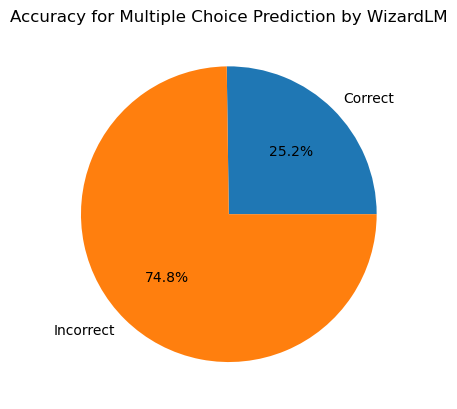

In [6]:
import matplotlib.pyplot as plt
sizes = [0.2520, 1-0.2530]
labels = ['Correct', 'Incorrect']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Accuracy for Multiple Choice Prediction by WizardLM')
plt.show()

#### Year

In [17]:
WLMyearsData = {}
for year in allYears:
    yearData = WLMTotal[WLMTotal['Year']==year]
    yearData = yearData.reset_index()
    WLMyearsData[year] = calculateBRIER(yearData)

#### Categories

In [18]:
present = {cat:[] for cat in allCategories}

for i in range(len(WLMTotal['Categories'])):
    WLMTotal['Categories'][i] = ast.literal_eval(WLMTotal['Categories'][i])
    for cat in present:
        if cat in WLMTotal['Categories'][i]:
            present[cat].append(True)
        else:
            present[cat].append(False)

for cat in present:
    WLMTotal[cat] = present[cat]

C:\Users\vetur\AppData\Local\Temp\ipykernel_1892\2488170240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WLMTotal['Categories'][i] = ast.literal_eval(WLMTotal['Categories'][i])


In [19]:
WLMcategoriesData = {}
for category in allCategories:
    categoryData = WLMTotal[WLMTotal[category]]
    categoryData = categoryData.reset_index()
    WLMcategoriesData[category] = calculateBRIER(categoryData)

### Hermes

In [36]:
HermesPredictions = pd.read_csv('data/Multiple/HermesMulti0-925.csv')
HermesPredictions

,Unnamed: 0,predictions
0,0,"Between 6.30 and 6.35, inclusive"
1,1,A majority.
2,2,"Yes, and the resolution will become law."
3,3,Mauricio Macri
4,4,Majority
...,...,...
921,921,More than or equal to 40 but less than 50
922,922,More than or equal to $3000 but less than $3500.
923,923,More than or equal to $240 but less than $260
924,924,More than or equal to $75 but less than $90


In [37]:
HermesTotal = questions.copy(deep=True)
HermesTotal['Predictions'] = HermesPredictions['predictions']
HermesTotal

,QuestionText,Answer,Year,Categories,AnswerChoices,Predictions
0,What will the end-of-day closing value for the...,6.40 or more,2016,['Stock Market'],"['Less than 6.30', 'Between 6.30 and 6.35, inc...","Between 6.30 and 6.35, inclusive"
1,How many seats will the Justice and Developmen...,A majority,2015,[],"['A majority', 'A plurality', 'Not a plurality']",A majority.
2,Will Congress pass a resolution disapproving t...,No,2015,[],"['No', 'Yes, but the resolution will be vetoed...","Yes, and the resolution will become law."
3,Who will win the presidential election in Arge...,Mauricio Macri,2015,"['Political', 'Stock Market']","['Someone else', 'Sergio Massa', 'Mauricio Mac...",Mauricio Macri
4,How many seats in Poland's Sejm will PiS (Law ...,Majority,2015,[],"['Majority', 'Plurality', 'Not a Plurality']",Majority
...,...,...,...,...,...,...
921,Jun 2022,More than or equal to 90 but less than 100,2022,['Stock Market'],"['Less than 40', 'More than or equal to 40 but...",More than or equal to 40 but less than 50
922,What will be the price per ton of aluminum on ...,Less than $3000,2022,[],"['Less than $3000', 'More than or equal to $30...",More than or equal to $3000 but less than $3500.
923,What will be the end of day closing price of t...,Less than $240,2022,['Stock Market'],"['Less than $240', 'More than or equal to $240...",More than or equal to $240 but less than $260
924,What will be the price of crude oil futures on...,More than or equal to $105 but less than $120,2022,['Stock Market'],"['Less than $75', 'More than or equal to $75 b...",More than or equal to $75 but less than $90


In [38]:
for i in range(len(HermesTotal)):
    answer_choices_str = HermesTotal['AnswerChoices'][i]
    predictions_text = str(HermesTotal['Predictions'][i])


    if pd.notna(answer_choices_str):
        answer_choices = ast.literal_eval(answer_choices_str)

        matching_string, matching_index = find_matching_string(answer_choices, predictions_text)

        HermesTotal.at[i, 'MatchingString'] = matching_string
        HermesTotal.at[i, 'MatchingIndex'] = matching_index


HermesTotal[['Predictions', 'AnswerChoices', 'MatchingString']]

,Predictions,AnswerChoices,MatchingString
0,"Between 6.30 and 6.35, inclusive","['Less than 6.30', 'Between 6.30 and 6.35, inc...","Between 6.30 and 6.35, inclusive"
1,A majority.,"['A majority', 'A plurality', 'Not a plurality']",None
2,"Yes, and the resolution will become law.","['No', 'Yes, but the resolution will be vetoed...","Yes, but the resolution will be vetoed by the ..."
3,Mauricio Macri,"['Someone else', 'Sergio Massa', 'Mauricio Mac...",Mauricio Macri
4,Majority,"['Majority', 'Plurality', 'Not a Plurality']",None
...,...,...,...
921,More than or equal to 40 but less than 50,"['Less than 40', 'More than or equal to 40 but...",Less than 40
922,More than or equal to $3000 but less than $3500.,"['Less than $3000', 'More than or equal to $30...",Less than $3000
923,More than or equal to $240 but less than $260,"['Less than $240', 'More than or equal to $240...",Less than $240
924,More than or equal to $75 but less than $90,"['Less than $75', 'More than or equal to $75 b...",Less than $75


In [39]:
calculateBRIER(HermesTotal)

(0.712998712998713, 149, 0.287001287001287, 4.827541827541827)

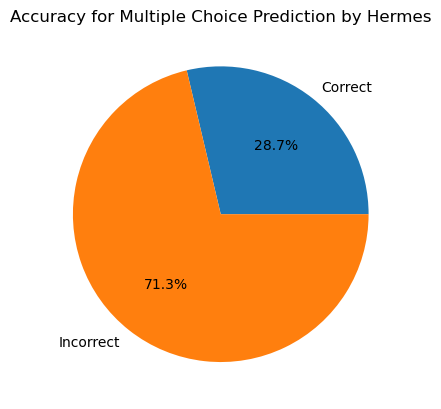

In [7]:
import matplotlib.pyplot as plt
sizes = [0.2870, 1-0.2870]
labels = ['Correct', 'Incorrect']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Accuracy for Multiple Choice Prediction by Hermes')
plt.show()

In [20]:
HermesyearsData = {}
for year in allYears:
    yearData = HermesTotal[HermesTotal['Year']==year]
    yearData = yearData.reset_index()
    HermesyearsData[year] = calculateBRIER(yearData)

#### Categories

present = {cat:[] for cat in allCategories}

for i in range(len(HermesTotal['Categories'])):
    HermesTotal['Categories'][i] = ast.literal_eval(HermesTotal['Categories'][i])
    for cat in present:
        if cat in HermesTotal['Categories'][i]:
            present[cat].append(True)
        else:
            present[cat].append(False)

for cat in present:
    HermesTotal[cat] = present[cat]

HermescategoriesData = {}
for category in allCategories:
    categoryData = HermesTotal[HermesTotal[category]]
    categoryData = categoryData.reset_index()
    HermescategoriesData[category] = calculateBRIER(categoryData)

NameError: name 'HermesTotal' is not defined

### Falcon

In [40]:
FalconPredictions = pd.read_csv('data/Multiple/FalconMulti0-925.csv')
FalconPredictions

,Unnamed: 0,predictions
0,0,The end-of-day closing value for the dollar ag...
1,1,A plurality
2,2,Congress is unlikely to pass a resolution disa...
3,3,Daniel Scioli
4,4,Majority
...,...,...
921,921,"The answer is ""Less than 40""."
922,922,The price per ton of aluminum on 1 June 2022 w...
923,923,The end of day closing price of the VanEck Sem...
924,924,"I'm sorry, I cannot answer this question as it..."


In [41]:
FalconTotal = questions.copy(deep=True)
FalconTotal['Predictions'] = FalconPredictions['predictions']
FalconTotal

,QuestionText,Answer,Year,Categories,AnswerChoices,Predictions
0,What will the end-of-day closing value for the...,6.40 or more,2016,['Stock Market'],"['Less than 6.30', 'Between 6.30 and 6.35, inc...",The end-of-day closing value for the dollar ag...
1,How many seats will the Justice and Developmen...,A majority,2015,[],"['A majority', 'A plurality', 'Not a plurality']",A plurality
2,Will Congress pass a resolution disapproving t...,No,2015,[],"['No', 'Yes, but the resolution will be vetoed...",Congress is unlikely to pass a resolution disa...
3,Who will win the presidential election in Arge...,Mauricio Macri,2015,"['Political', 'Stock Market']","['Someone else', 'Sergio Massa', 'Mauricio Mac...",Daniel Scioli
4,How many seats in Poland's Sejm will PiS (Law ...,Majority,2015,[],"['Majority', 'Plurality', 'Not a Plurality']",Majority
...,...,...,...,...,...,...
921,Jun 2022,More than or equal to 90 but less than 100,2022,['Stock Market'],"['Less than 40', 'More than or equal to 40 but...","The answer is ""Less than 40""."
922,What will be the price per ton of aluminum on ...,Less than $3000,2022,[],"['Less than $3000', 'More than or equal to $30...",The price per ton of aluminum on 1 June 2022 w...
923,What will be the end of day closing price of t...,Less than $240,2022,['Stock Market'],"['Less than $240', 'More than or equal to $240...",The end of day closing price of the VanEck Sem...
924,What will be the price of crude oil futures on...,More than or equal to $105 but less than $120,2022,['Stock Market'],"['Less than $75', 'More than or equal to $75 b...","I'm sorry, I cannot answer this question as it..."


In [42]:
for i in range(len(FalconTotal)):
    answer_choices_str = FalconTotal['AnswerChoices'][i]
    predictions_text = str(FalconTotal['Predictions'][i])


    if pd.notna(answer_choices_str):
        answer_choices = ast.literal_eval(answer_choices_str)

        matching_string, matching_index = find_matching_string(answer_choices, predictions_text)

        FalconTotal.at[i, 'MatchingString'] = matching_string
        FalconTotal.at[i, 'MatchingIndex'] = matching_index


FalconTotal[['Predictions', 'AnswerChoices', 'MatchingString']]

,Predictions,AnswerChoices,MatchingString
0,The end-of-day closing value for the dollar ag...,"['Less than 6.30', 'Between 6.30 and 6.35, inc...","Between 6.30 and 6.35, inclusive"
1,A plurality,"['A majority', 'A plurality', 'Not a plurality']",A plurality
2,Congress is unlikely to pass a resolution disa...,"['No', 'Yes, but the resolution will be vetoed...","Yes, but the resolution will be vetoed by the ..."
3,Daniel Scioli,"['Someone else', 'Sergio Massa', 'Mauricio Mac...",Daniel Scioli
4,Majority,"['Majority', 'Plurality', 'Not a Plurality']",None
...,...,...,...
921,"The answer is ""Less than 40"".","['Less than 40', 'More than or equal to 40 but...",None
922,The price per ton of aluminum on 1 June 2022 w...,"['Less than $3000', 'More than or equal to $30...",More than or equal to $3000 but less than $3500
923,The end of day closing price of the VanEck Sem...,"['Less than $240', 'More than or equal to $240...",More than or equal to $240 but less than $260
924,"I'm sorry, I cannot answer this question as it...","['Less than $75', 'More than or equal to $75 b...",None


In [43]:
calculateBRIER(FalconTotal)

(0.7654516640253566, 295, 0.23454833597464342, 4.7242472266244055)

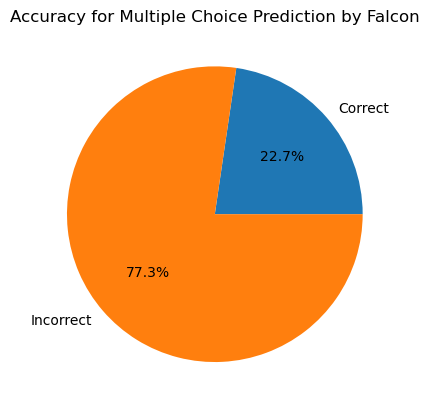

In [8]:
import matplotlib.pyplot as plt
sizes = [0.2245, 1-0.2345]
labels = ['Correct', 'Incorrect']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Accuracy for Multiple Choice Prediction by Falcon')
plt.show()

In [21]:
FalconyearsData = {}
for year in allYears:
    yearData = FalconTotal[FalconTotal['Year']==year]
    yearData = yearData.reset_index()
    FalconyearsData[year] = calculateBRIER(yearData)

#### Categories

present = {cat:[] for cat in allCategories}

for i in range(len(FalconTotal['Categories'])):
    FalconTotal['Categories'][i] = ast.literal_eval(FalconTotal['Categories'][i])
    for cat in present:
        if cat in FalconTotal['Categories'][i]:
            present[cat].append(True)
        else:
            present[cat].append(False)

for cat in present:
    FalconTotal[cat] = present[cat]

FalconcategoriesData = {}
for category in allCategories:
    categoryData = FalconTotal[FalconTotal[category]]
    categoryData = categoryData.reset_index()
    FalconcategoriesData[category] = calculateBRIER(categoryData)

NameError: name 'FalconTotal' is not defined